In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Read sns Tips data
tips = sns.load_dataset('tips')
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


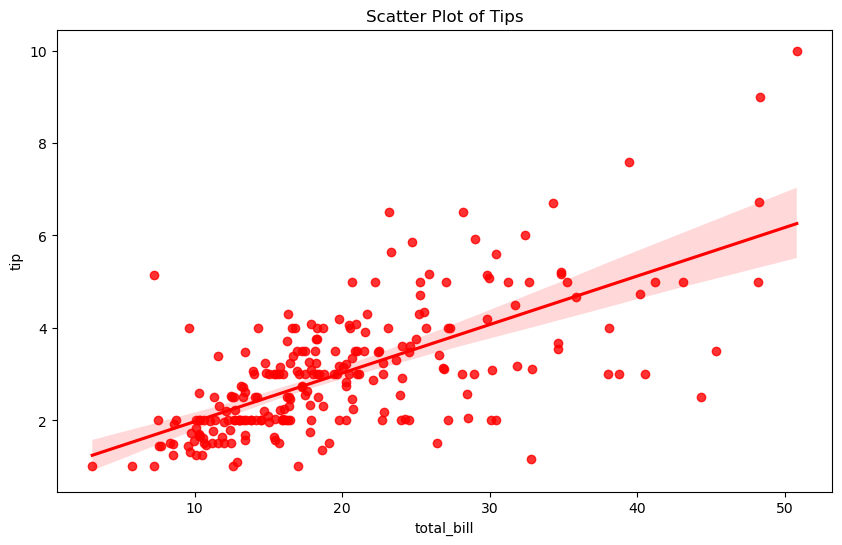

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x='total_bill', y='tip', data=tips, color='red') 
plt.title('Scatter Plot of Tips')
plt.show()


In [28]:
#회귀 -> 기계학습 기본 알고리즘 
#y = ax + b
df =  pd.read_excel('./Data/Ecommerce/E_Commerce_Dataset.xlsx', sheet_name='Raw')
col = ['CustomerID', 'Gender', 'MaritalStatus', 'CouponUsed', 'OrderCount']
df = df[col]
df.head()

,CustomerID,Gender,MaritalStatus,CouponUsed,OrderCount
0,50001,Female,Single,1.0,1.0
1,50002,Male,Single,0.0,1.0
2,50003,Male,Single,0.0,1.0
3,50004,Male,Single,0.0,1.0
4,50005,Male,Single,1.0,1.0


In [18]:
df[['CustomerID', 'CouponUsed', 'OrderCount']].corr()  

,CustomerID,CouponUsed,OrderCount
CustomerID,1.000000,0.234302,0.139008
CouponUsed,0.234302,1.000000,0.745245
OrderCount,0.139008,0.745245,1.000000


In [31]:
#문자 타입이 있는지 확인함

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     5630 non-null   float64
 1   Gender         5630 non-null   float64
 2   MaritalStatus  5630 non-null   float64
 3   CouponUsed     5630 non-null   float64
 4   OrderCount     5630 non-null   float64
dtypes: float64(5)
memory usage: 220.1 KB


In [29]:
# 전처리 (Numeric으로 바꾸자)
df = df.apply(pd.to_numeric, errors = 'coerce')
df = df.fillna(method='ffill', axis=1)

In [30]:
Y = df['OrderCount'].values
X = df['CouponUsed'].values
X = sm.add_constant(X) #Add constant for intercept
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     111.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.13e-26
Time:                        02:44:50   Log-Likelihood:                -13974.
No. Observations:                5630   AIC:                         2.795e+04
Df Residuals:                    5628   BIC:                         2.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8923      0.040     73.218      0.000       2.815       2.970
x1          3.734e-05   3.53e-06     10.570      0.000    3.04e-05    4.43e-05
==============================================================================
Omnibus:                     2359.614   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9065.198
Skew:                           2.123   Prob(JB):                         0.00
Kurtosis:                       7.541   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""